# <span style="color:blue"> Metodos Espectrais e Decomposição de Matrizes</span>
## <font color='blue'>Autovalores e Autovetores</font>

## <span style="color:blue">Solução dos Exercícios</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**

In [44]:
import numpy as np

### Exercício 1) 
Mostre que para qualquer matriz $\mathbf{A}$ com colunas LI, a matriz $\mathbf{A}^\top\mathbf{A}$ é simétrica e semi-definida positiva.

### Exercício 2)
Construa uma matriz $\mathbf{A}$ definida positiva  $10\times 10$ e verifique que o produto $\mathbf{x}^\top\mathbf{A}\mathbf{x}>0$ para alguns vetores $\mathbf{x}$.

**Solução**



In [25]:
B = np.random.uniform(0,1,size=(10,10))

b = np.linalg.det(B)            #Verificando se X é LI.
print('Como det(B) é', b, 'então os vetores da matriz é LI.')

Q,R = np.linalg.qr(B)          #Fatoração QR da matriz X.

L = np.diag(np.random.uniform(1,5,10))     #Criando a matriz dos lambdas.

A = np.linalg.multi_dot([Q,L,Q.T])    #Gerando A definida positiva.

#Testando se A realmente é definida positiva.

X = np.random.uniform(0,1,size=(10,30))
FQ = []


for i in range(X.shape[1]):
    FQ.append(np.linalg.multi_dot([X[:,i].T,A,X[:,i]]))
    
    
print('A matriz é definida positiva?', np.all(np.array(FQ) > 0))

Como det(B) é 0.021411003972704182 então os vetores da matriz é LI.
A matriz é definida positiva? True


### Exercício 3)
Construa uma transformação linear que mapeia o vetor $\mathbf{v}=[1,1,1,1,1]\in\mathbb{R}^5$ nele mesmo, ou seja, a transformação deve satisfazer 

$$
\mathbf{A}\mathbf{v}=\mathbf{v}
$$

In [40]:
#Construindo v
v = np.array([1,1,1,1,1])
# construindo a matriz com colunas LI garantindo v como a última coluna
S = np.random.randint(0,100,size=(5,5))
S[:,-1] = v

det = np.linalg.det(S)
if det == 0:
    print('Gerar novos colunas randomicas para S, demos azar')
else:
    print('Construção bem sucedida')
    S_1 = np.linalg.inv(S)
    
    # Construindo a matriz de autovalores sendo o autovalor 1 na última posição
    d = np.random.uniform(0,10,5)
    d[-1] = 1
    L = np.diag(d)
    
    # Constuindo a transformação
    A = np.linalg.multi_dot([S,L,S_1])
    
    # Garantindo que v é um autovetor
    print('A matriz de transformação é:\n',A)
    print('\n A imagem de [1,1,1,1,1] é:',np.dot(A,v))
    

Construção bem sucedida
A matriz de transformação é:
 [[-25.57048984  12.58535192   8.77456965 -10.21724416  15.42781243]
 [-37.66799511  19.50461073  10.13788025 -11.13280602  20.15831016]
 [-11.39509089   6.8905274    3.71948286  -3.83786458   5.62294522]
 [ -1.10332332   4.27599778  -7.9006113    5.58200493   0.14593191]
 [-20.95651086  10.50346262   4.7300701   -7.61047085  14.33344899]]

 A imagem de [1,1,1,1,1] é: [1. 1. 1. 1. 1.]


### Exercício 4) 
Encontre a equação de uma elipse cujo o eixo maior está na direção do vetor $[1,1]$.

**Solução**



In [67]:
# matriz ortonormal dos autovetores
Q = np.array([[1, 1],[-1, 1]]).T # matriz ortogonal com [1,1] como uma das colunas
Q = Q/np.linalg.norm(Q,axis=0)  # normalizando as colunas para que tenham norma 1
print(np.linalg.det(Q))

# matriz diagonal dos autovalores, sendo que o menor autovalor corresponde a primeira coluna de Q
l = np.array([0.3, 1])
L = np.diag(l)

# Matriz definida positiva com [1,1] como autovetor associado ao menor autovalor
A = np.linalg.multi_dot([Q,L,Q.T])
np.set_printoptions(precision=2)
print('A matriz definida positiva é\n',A)

# Equação da elipse
print('A equação da elipse é\n','{:4.2f}'.format(A[0,0]),'xˆ2',\
      '{:4.2f}'.format(2*A[0,1]),'xy','+{:4.2f}'.format(A[1,1]),'yˆ2 = 1')

0.9999999999999998
A matriz definida positiva é
 [[ 0.65 -0.35]
 [-0.35  0.65]]
A equação da elipse é
 0.65 xˆ2 -0.70 xy +0.65 yˆ2 = 1


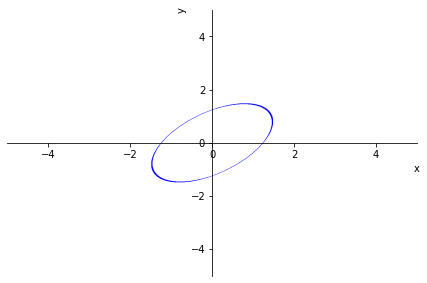

In [68]:
# desenhando a elipse
from sympy import symbols, Eq, plot_implicit

x,y = symbols('x y')
p1 = plot_implicit(Eq(A[0,0]*x**2+2*A[0,1]*x*y+A[1,1]*y**2,1))


### Exercício 5)
Encontre uma trasformação linear cujos autovetores são $v_1=[1,1]$ e $v_2=[1,-1]$ e os autovalores correspondentes são $a_1$ e $a_2$, respectivamente. Os valores de $a_1$ e $a_2$ devem ser escolhidos por você. Verifique graficamente o efeito desta transformação no círculo $x^2+y^2=1$.
O que acontece quando $a = b$, $a > b$ e $a < b$?

In [81]:
# os vetores v1 e v2 são LI, logo podemos considerá-los como autovetores da transformação
# precisamos apenas definir os autovalores

S = np.array([[1,1],[1,-1]]).T
S_1 = np.linalg.inv(S)
L = np.diag([0.5,0.1])

# montando a transformação linear
A = np.linalg.multi_dot([S,L,S_1])

# gerando pontos no ciruclo
n = 100 # numero de pontos sobre o circulo
t = np.linspace(0,2*np.pi,n)
X = np.zeros((2,n))
X[0,:] = np.cos(t)
X[1,:] = np.sin(t)

# encontrando a transformacao de X
AX = np.dot(A,X)

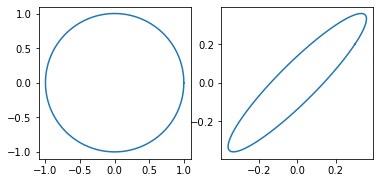

In [82]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.set_aspect('equal')
ax1.plot(X[0,:],X[1,:])

ax2.set_aspect('equal')
ax2.plot(AX[0,:],AX[1,:])

### Exercício 6)
Em muitos problemas reais, o que se busca é contrar o maior autovalor de uma matriz e seu correspondente autovetor. Vamos denotar os autovalores de uma matriz $\mathbf{A}$ em ordem decrescente $|\lambda_n|<\ldots\leq|\lambda_1|$ e analisar o efeito de aplicar $\mathbf{A}$ sucessivamente a partir de um vetor qualquer (randomico) $\mathbf{x}$. Sendo $\mathbf{u}_n,\ldots,\mathbf{u}_1$ os autovalores correspondentes, temos que:

$$
\mathbf{x}=c_n\mathbf{u}_n+c_{n-1}\mathbf{u}_{n-1}+\cdots+c_1\mathbf{u}_1\\
\downarrow\\
\mathbf{x}^1=\mathbf{A}\mathbf{x} = c_n\mathbf{A}\mathbf{u}_n+c_{n-1}\mathbf{A}\mathbf{u}_{n-1}+\cdots+c_1\mathbf{A}\mathbf{u}_1 = c_n\lambda_n\mathbf{u}_n+c_{n-1}\lambda_{n-1}\mathbf{u}_{n-1}+\cdots+c_1\lambda_1\mathbf{u}_1\\
\downarrow\\
\mathbf{x}^2=\mathbf{A}\mathbf{x}^1=c_n\lambda_n^2\mathbf{u}_n+c_{n-1}\lambda_{n-1}^2\mathbf{u}_{n-1}+\cdots+c_1\lambda_1^2\mathbf{u}_1\\
\downarrow\\
\vdots\\
\downarrow\\
\mathbf{x}^k=\mathbf{A}\mathbf{x}^{k-1}=c_n\lambda_n^k\mathbf{u}_n+c_{n-1}\lambda_{n-1}^{k}\mathbf{u}_{n-1}+\cdots+c_1\lambda_1^k\mathbf{u}_1 = \\
\lambda_n^k\left(c_n\mathbf{u}_n+(\frac{\lambda_{n-1}}{\lambda_{n}})^k \mathbf{u}_{n-1}+\cdots+ (\frac{\lambda_{1}}{\lambda_{n}})^k \mathbf{u}_{1}  \right)
$$

Como $\frac{\lambda_{i}}{\lambda_{n}}<1$ temos que $(\frac{\lambda_{i}}{\lambda_{n}})^k\rightarrow 0$ quando $k\rightarrow\infty$. Assim:

$$
\mathbf{x}^k=\mathbf{A}\mathbf{x}^{k-1}\rightarrow \lambda_n^k c_n\mathbf{u}_n
$$

Ou seja, $\mathbf{A}\mathbf{x}^{k-1}$ converge para o autovetor $\mathbf{u}_n$. Uma vez encontrada a aproximação do autovetor, podemos obter o autovalor pelo coeficiente de Rayleigh:

$$
\lambda_n = \frac{(\mathbf{x}^k)^\top\mathbf{A}\mathbf{x}^k}{(\mathbf{x}^k)^\top\mathbf{x}^k}
$$

O método acima para calcular o maior autovetor e autovalor é chamado de **método das potências**.

Implemente o método das potência e aplique-o para encontrar o maior autovetor e autovalor da  matriz $\mathbf{A}$ (simétrica) descrita abaixo. Compare seu resultado com o obtido pelo método <font color='blue'> eigh </font> do <font color='blue'> numpy </font>.

In [86]:
A = np.array([[ 0.59,  0.14,  0.18,  0.04,  0.13],
              [ 0.14,  1.14, -0.  ,  0.51,  0.45],
              [ 0.18, -0.  ,  0.56,  0.17, -0.02],
              [ 0.04,  0.51,  0.17,  0.99,  0.37],
              [ 0.13,  0.45, -0.02,  0.37,  1.14]])

In [87]:
def m_potencias(A,ninter=1000):  # realizamos 1000 iteracoes como padrão
    x = np.random.uniform(0,1,size=(A.shape[0],1))
    
    for i in range(ninter):
        x = np.dot(A,x)
        
    return(x)

In [88]:
Axn = m_potencias(A)
print(Axn)
print(Axn/np.linalg.norm(Axn))

L,S = np.linalg.eigh(A)
print(S[:,-1])

# Note que os resultados são muito diferentes, ou seja, o método das potências como 
# descrito acima não funciona como esperado (veja exercício 7)

[[8.05e+302]
 [3.67e+303]
 [4.20e+302]
 [3.13e+303]
 [3.32e+303]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0.14 0.62 0.07 0.53 0.56]


### Exercício 7)
O método das potências como descrito no exercício 6) não funciona corretamente devido ao problema de overflow (ou underflow). A razão é que $\mathbf{A}\mathbf{x}^{k-1}\rightarrow \lambda_n^k c_n\mathbf{u}_n$, ou seja, a convergência é para um múltiplo do maior autovetor com fator multiplicador dado por $\lambda_n^k$. Portanto, se $\lambda>1$, este termo tende para infinito (overflow) e se $\lambda<1$ ele tende a zero (underflow). 

Para corrigir este problema, realiz-se uma normalização do vetor obtido a cada passo da iteração. 

Implemente a versão do método da potência com o termo de normalização e refaça os testes do exercício 6). 

In [89]:
def m_potencias_normalizado(A,ninter=1000):  # realizamos 1000 iteracoes como padrão
    x = np.random.uniform(0,1,size=(A.shape[0],1))
    
    for i in range(ninter):
        x = np.dot(A,x)
        x = x/np.linalg.norm(x)
        
    return(x)

In [91]:
Axn = m_potencias_normalizado(A)
Lxn = np.linalg.multi_dot([Axn.T,A,Axn])/np.dot(Axn.T,Axn)

L,S = np.linalg.eigh(A)

print('Autovetor\n')
print('Metodo das Potencias com Normalização\n',Axn[:,0])
print('Metodo eigh do numpy\n',S[:,-1])

print(print('Autovalor\n'))
print('Metodo das Potencias com Normalização\n',Lxn[0,0])
print('Metodo eigh do numpy\n',L[-1])

Autovetor

Metodo das Potencias com Normalização
 [0.14 0.62 0.07 0.53 0.56]
Metodo eigh do numpy
 [0.14 0.62 0.07 0.53 0.56]
Autovalor

None
Metodo das Potencias com Normalização
 2.013786142857087
Metodo eigh do numpy
 2.0137861428570862
